In [1]:
import tobac
import tobac.testing

In [2]:
%%capture

data = tobac.testing.make_sample_data_2D_3blobs_inv()
dxy, dt = tobac.utils.get_spacings(data)
features = tobac.feature_detection.feature_detection_multithreshold(data, dxy, threshold = 1)
mask, features = tobac.segmentation.segmentation(features, data, dxy, threshold = 1)
track = tobac.tracking.linking_trackpy(features, data, dt, dxy, v_max=100)

In [ ]:
%%capture

data = tobac.testing.make_sample_data_3D_3blobs()
dxy, dt = tobac.utils.get_spacings(data)
features = tobac.feature_detection.feature_detection_multithreshold(data[:, 0], dxy, threshold = 1)
mask, features = tobac.segmentation.segmentation(features, data, dxy, threshold = 1)
track = tobac.tracking.linking_trackpy(features, data, dt, dxy, v_max=100)

# Analysis

## Calculate overlap

In [90]:
tobac.analysis.calculate_overlap(track, track, min_mean_inv_distance=1)

/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/analysis.py:378: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overlap=overlap.append({'cell_1':cell_1,
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/analysis.py:378: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overlap=overlap.append({'cell_1':cell_1,
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/analysis.py:378: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overlap=overlap.append({'cell_1':cell_1,
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/analysis.py:378: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  o

,cell_1,cell_2,n_overlap,mean_inv_distance,sum_inv_distance
0,1.0,1.0,60.0,1.0,60.0
4,2.0,2.0,30.0,1.0,30.0
8,3.0,3.0,20.0,1.0,20.0


In [28]:
track

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_x_coordinate,projection_y_coordinate,latitude,longitude,ncells,cell,time_cell
0,0,1,14.272026,14.272026,908,1,1,2000-01-01 12:00:00,2000-01-01 12:00:00,14272.026432,14272.026432,[24.14272026431718],[150.14272026431718],0.0,1,0 days 00:00:00
1,1,1,15.228659,14.670732,984,1,2,2000-01-01 12:01:00,2000-01-01 12:01:00,15228.658537,14670.731707,[24.15228658536585],[150.14670731707318],67.0,1,0 days 00:01:00
2,2,1,16.162111,15.055608,1061,1,3,2000-01-01 12:02:00,2000-01-01 12:02:00,16162.111216,15055.607917,[24.16162111215834],[150.1505560791706],65.0,1,0 days 00:02:00
3,3,1,17.130396,15.406167,1135,1,4,2000-01-01 12:03:00,2000-01-01 12:03:00,17130.396476,15406.167401,[24.171303964757712],[150.15406167400883],66.0,1,0 days 00:03:00
4,4,1,18.143802,15.751240,1210,1,5,2000-01-01 12:04:00,2000-01-01 12:04:00,18143.801653,15751.239669,[24.181438016528926],[150.15751239669422],65.0,1,0 days 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,67,2,85.393745,130.422614,1247,1,106,2000-01-01 13:07:00,2000-01-01 13:07:00,85393.744988,130422.614274,[24.853937449879712],[151.3042261427426],312.0,3,0 days 00:17:00
106,68,1,83.326203,30.149733,1496,1,107,2000-01-01 13:08:00,2000-01-01 13:08:00,83326.203209,30149.732620,[24.83326203208556],[150.30149732620322],277.0,2,0 days 00:28:00
107,68,2,86.731211,131.549072,1131,1,108,2000-01-01 13:08:00,2000-01-01 13:08:00,86731.211317,131549.071618,[24.867312113174183],[151.31549071618036],277.0,3,0 days 00:18:00
108,69,1,85.863315,30.864101,1273,1,109,2000-01-01 13:09:00,2000-01-01 13:09:00,85863.315004,30864.100550,[24.858633150039275],[150.30864100549883],229.0,2,0 days 00:29:00


In [32]:
import numpy as np
mask = track['cell'] == 1
np.array(track.where(mask)['ncells'])

array([  0.,  67.,  65.,  66.,  65.,  67.,  66.,  65.,  67.,  67.,  65.,
        66.,  65.,  65.,  66.,  65.,  67.,  67.,  65.,  66.,  67.,  65.,
        66.,  65.,  67.,  69.,  67.,  65.,  66.,  65.,  67.,  66.,  65.,
        67.,  67.,  65.,  66.,  65.,  65.,  66.,  65.,  nan,  nan,  67.,
        nan,  67.,  nan,  65.,  nan,  66.,  nan, 505., 500.,  nan, 502.,
        nan,  nan, 504.,  nan, 506.,  nan,  nan, 325.,  nan,  nan, 322.,
        nan, 322.,  nan,  nan,  nan, 323.,  nan,  nan, 322.,  nan,  nan,
       320., 320.,  nan,  nan, 323.,  nan,  nan,  nan,  nan, 324.,  nan,
        nan, 322.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

In [33]:
cell_track = track.where(mask)

In [36]:
mask2 = cell_track['time'].isin(cell_track['time'])

In [39]:
len(cell_track[mask2].dropna())

60

# histogram_featurewise

In [43]:
track

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_x_coordinate,projection_y_coordinate,latitude,longitude,ncells,cell,time_cell
0,0,1,14.272026,14.272026,908,1,1,2000-01-01 12:00:00,2000-01-01 12:00:00,14272.026432,14272.026432,[24.14272026431718],[150.14272026431718],0.0,1,0 days 00:00:00
1,1,1,15.228659,14.670732,984,1,2,2000-01-01 12:01:00,2000-01-01 12:01:00,15228.658537,14670.731707,[24.15228658536585],[150.14670731707318],67.0,1,0 days 00:01:00
2,2,1,16.162111,15.055608,1061,1,3,2000-01-01 12:02:00,2000-01-01 12:02:00,16162.111216,15055.607917,[24.16162111215834],[150.1505560791706],65.0,1,0 days 00:02:00
3,3,1,17.130396,15.406167,1135,1,4,2000-01-01 12:03:00,2000-01-01 12:03:00,17130.396476,15406.167401,[24.171303964757712],[150.15406167400883],66.0,1,0 days 00:03:00
4,4,1,18.143802,15.751240,1210,1,5,2000-01-01 12:04:00,2000-01-01 12:04:00,18143.801653,15751.239669,[24.181438016528926],[150.15751239669422],65.0,1,0 days 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,67,2,85.393745,130.422614,1247,1,106,2000-01-01 13:07:00,2000-01-01 13:07:00,85393.744988,130422.614274,[24.853937449879712],[151.3042261427426],312.0,3,0 days 00:17:00
106,68,1,83.326203,30.149733,1496,1,107,2000-01-01 13:08:00,2000-01-01 13:08:00,83326.203209,30149.732620,[24.83326203208556],[150.30149732620322],277.0,2,0 days 00:28:00
107,68,2,86.731211,131.549072,1131,1,108,2000-01-01 13:08:00,2000-01-01 13:08:00,86731.211317,131549.071618,[24.867312113174183],[151.31549071618036],277.0,3,0 days 00:18:00
108,69,1,85.863315,30.864101,1273,1,109,2000-01-01 13:09:00,2000-01-01 13:09:00,85863.315004,30864.100550,[24.858633150039275],[150.30864100549883],229.0,2,0 days 00:29:00


In [78]:
tobac.analysis.histogram_featurewise(track, variable='num', bin_edges=10)

(array([ 4,  2,  3,  2,  4,  7,  8, 43, 18, 19]),
 array([  88. ,  268.1,  448.2,  628.3,  808.4,  988.5, 1168.6, 1348.7,
        1528.8, 1708.9, 1889. ]),
 array([ 178.05,  358.15,  538.25,  718.35,  898.45, 1078.55, 1258.65,
        1438.75, 1618.85, 1798.95]))

# histogram_cellwise

In [25]:
tobac.analysis.histogram_cellwise(track, variable='num', bin_edges=10)

(array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1]),
 array([1457. , 1500.2, 1543.4, 1586.6, 1629.8, 1673. , 1716.2, 1759.4,
        1802.6, 1845.8, 1889. ]),
 array([1478.6, 1521.8, 1565. , 1608.2, 1651.4, 1694.6, 1737.8, 1781. ,
        1824.2, 1867.4]))

# plot_histogram_featurewise

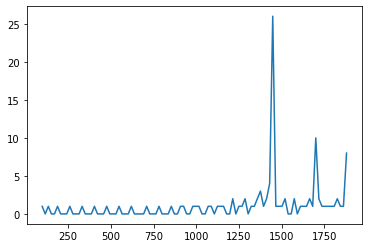

In [21]:
import matplotlib.pyplot as plt 
%matplotlib inline
fig, ax = plt.subplots()

test = tobac.plotting.plot_histogram_featurewise(track, 100,'num', axes=ax)

In [24]:
test[0]

# plot_histogram_cellwise

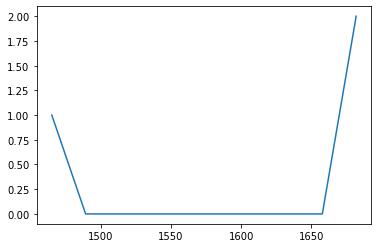

In [51]:
%matplotlib inline
fix, ax = plt.subplots()

test = tobac.plotting.plot_histogram_cellwise(track, 10,'ncells', 'max', axes=ax)

In [52]:
test

# plot_lifetime_histogram_bar

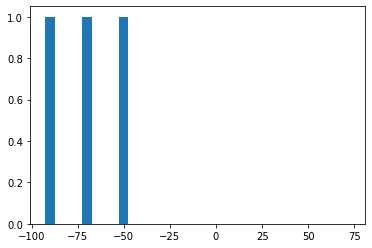

In [46]:
%matplotlib inline
fix, ax = plt.subplots()

test = tobac.plotting.plot_lifetime_histogram_bar(track, ax, density=False, width_bar=5, shift=-100)

In [49]:
type(test)

matplotlib.container.BarContainer

# plot_lifetime_histogram

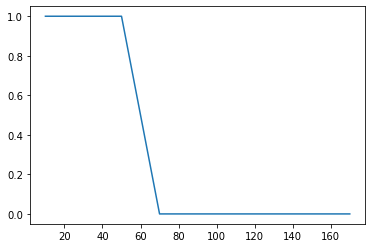

In [43]:
%matplotlib inline
fix, ax = plt.subplots()

test = tobac.plotting.plot_lifetime_histogram(track, ax, density=False)

In [45]:
test

## make_map

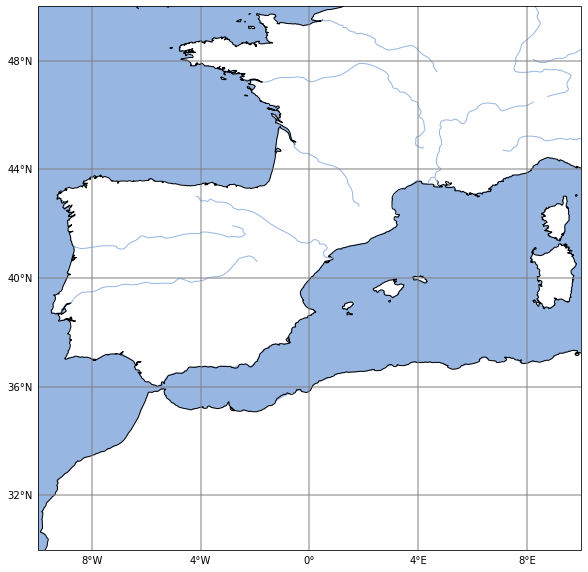

In [93]:
import cartopy
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.set_extent([-10, 10, 30, 50])
tobac.make_map(ax)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.RIVERS)

# area_histogram

In [139]:
features = tobac.analysis.calculate_area(features, mask)
features

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_x_coordinate,projection_y_coordinate,latitude,longitude,ncells,area
0,0,1,14.272026,14.272026,908,1,1,2000-01-01 12:00:00,2000-01-01 12:00:00,14272.026432,14272.026432,[24.14272026431718],[150.14272026431718],904.0,9.040000e+08
1,1,1,15.228659,14.670732,984,1,2,2000-01-01 12:01:00,2000-01-01 12:01:00,15228.658537,14670.731707,[24.15228658536585],[150.14670731707318],983.0,9.830000e+08
2,2,1,16.162111,15.055608,1061,1,3,2000-01-01 12:02:00,2000-01-01 12:02:00,16162.111216,15055.607917,[24.16162111215834],[150.1505560791706],1059.0,1.059000e+09
3,3,1,17.130396,15.406167,1135,1,4,2000-01-01 12:03:00,2000-01-01 12:03:00,17130.396476,15406.167401,[24.171303964757712],[150.15406167400883],1135.0,1.135000e+09
4,4,1,18.143802,15.751240,1210,1,5,2000-01-01 12:04:00,2000-01-01 12:04:00,18143.801653,15751.239669,[24.181438016528926],[150.15751239669422],1208.0,1.208000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,67,2,85.393745,130.422614,1247,1,106,2000-01-01 13:07:00,2000-01-01 13:07:00,85393.744988,130422.614274,[24.853937449879712],[151.3042261427426],1247.0,1.247000e+09
106,68,1,83.326203,30.149733,1496,1,107,2000-01-01 13:08:00,2000-01-01 13:08:00,83326.203209,30149.732620,[24.83326203208556],[150.30149732620322],1127.0,1.496000e+09
107,68,2,86.731211,131.549072,1131,1,108,2000-01-01 13:08:00,2000-01-01 13:08:00,86731.211317,131549.071618,[24.867312113174183],[151.31549071618036],1127.0,1.127000e+09
108,69,1,85.863315,30.864101,1273,1,109,2000-01-01 13:09:00,2000-01-01 13:09:00,85863.315004,30864.100550,[24.858633150039275],[150.30864100549883],1015.0,1.273000e+09


In [143]:
tobac.analysis.area_histogram(features, mask, bin_edges = 10, representative_area = True)

(array([6.8500e+08, 7.3100e+08, 1.6510e+09, 1.4840e+09, 3.6710e+09,
        7.5730e+09, 1.0151e+10, 6.1815e+10, 3.3434e+10, 3.1262e+10]),
 array([8.8000e+07, 2.6790e+08, 4.4780e+08, 6.2770e+08, 8.0760e+08,
        9.8750e+08, 1.1674e+09, 1.3473e+09, 1.5272e+09, 1.7071e+09,
        1.8870e+09]),
 array([1.77950e+08, 3.57850e+08, 5.37750e+08, 7.17650e+08, 8.97550e+08,
        1.07745e+09, 1.25735e+09, 1.43725e+09, 1.61715e+09, 1.79705e+09]))

In [144]:
tobac.analysis.area_histogram(features, mask, bin_edges = 10)

(array([ 4,  2,  3,  2,  4,  7,  8, 43, 20, 17]),
 array([8.8000e+07, 2.6790e+08, 4.4780e+08, 6.2770e+08, 8.0760e+08,
        9.8750e+08, 1.1674e+09, 1.3473e+09, 1.5272e+09, 1.7071e+09,
        1.8870e+09]),
 array([1.77950e+08, 3.57850e+08, 5.37750e+08, 7.17650e+08, 8.97550e+08,
        1.07745e+09, 1.25735e+09, 1.43725e+09, 1.61715e+09, 1.79705e+09]))

## map_track

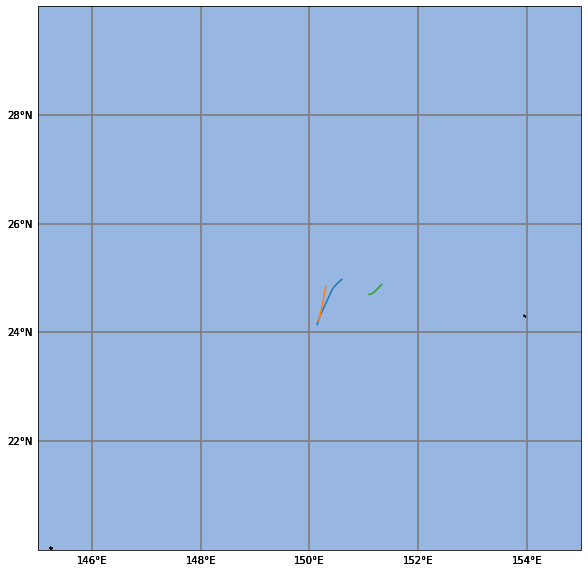

In [98]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
tobac.map_tracks(track, axis_extent=[145, 155, 20, 30], axes=ax)
ax.add_feature(cartopy.feature.OCEAN)

# calculate area

In [110]:
tobac.analysis.calculate_area(features, mask)

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_x_coordinate,projection_y_coordinate,latitude,longitude,area
0,0,1,14.272026,14.272026,908,1,1,2000-01-01 12:00:00,2000-01-01 12:00:00,14272.026432,14272.026432,[24.14272026431718],[150.14272026431718],0.0
1,1,1,15.228659,14.670732,984,1,2,2000-01-01 12:01:00,2000-01-01 12:01:00,15228.658537,14670.731707,[24.15228658536585],[150.14670731707318],67000000.0
2,2,1,16.162111,15.055608,1061,1,3,2000-01-01 12:02:00,2000-01-01 12:02:00,16162.111216,15055.607917,[24.16162111215834],[150.1505560791706],65000000.0
3,3,1,17.130396,15.406167,1135,1,4,2000-01-01 12:03:00,2000-01-01 12:03:00,17130.396476,15406.167401,[24.171303964757712],[150.15406167400883],66000000.0
4,4,1,18.143802,15.751240,1210,1,5,2000-01-01 12:04:00,2000-01-01 12:04:00,18143.801653,15751.239669,[24.181438016528926],[150.15751239669422],65000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,67,2,85.393745,130.422614,1247,1,106,2000-01-01 13:07:00,2000-01-01 13:07:00,85393.744988,130422.614274,[24.853937449879712],[151.3042261427426],312000000.0
106,68,1,83.326203,30.149733,1496,1,107,2000-01-01 13:08:00,2000-01-01 13:08:00,83326.203209,30149.732620,[24.83326203208556],[150.30149732620322],494000000.0
107,68,2,86.731211,131.549072,1131,1,108,2000-01-01 13:08:00,2000-01-01 13:08:00,86731.211317,131549.071618,[24.867312113174183],[151.31549071618036],277000000.0
108,69,1,85.863315,30.864101,1273,1,109,2000-01-01 13:09:00,2000-01-01 13:09:00,85863.315004,30864.100550,[24.858633150039275],[150.30864100549883],412000000.0


In [134]:
for coord in mask.coords():
    if coord.has_bounds():
        print(np.diff(coord.bounds))

[[1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]]
[[1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]
 [1000.]


In [121]:
test = np.diff(mask.coord('projection_x_coordinate').bounds)

In [126]:
np.outer(test, test).shape

(100, 100)

In [138]:
mask.coord('projection_x_coordinate')

<DimCoord: projection_x_coordinate / (m)  [ 0., 1000., ..., 98000., 99000.]+bounds  shape(100,)>

In [117]:
mask

Segmentation Mask (1),time,projection_x_coordinate,projection_y_coordinate
Shape,100,100,200
Dimension coordinates,,,
time,x,-,-
projection_x_coordinate,-,x,-
projection_y_coordinate,-,-,x
Auxiliary coordinates,,,
latitude,-,x,x
longitude,-,x,x


# calculate_nearestneighbordistance

In [3]:
tobac.calculate_nearestneighbordistance(features)

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_x_coordinate,projection_y_coordinate,latitude,longitude,min_distance
0,0,1,14.272026,14.272026,908,1,1,2000-01-01 12:00:00,2000-01-01 12:00:00,14272.026432,14272.026432,[24.14272026431718],[150.14272026431718],NaN
1,1,1,15.228659,14.670732,984,1,2,2000-01-01 12:01:00,2000-01-01 12:01:00,15228.658537,14670.731707,[24.15228658536585],[150.14670731707318],NaN
2,2,1,16.162111,15.055608,1061,1,3,2000-01-01 12:02:00,2000-01-01 12:02:00,16162.111216,15055.607917,[24.16162111215834],[150.1505560791706],NaN
3,3,1,17.130396,15.406167,1135,1,4,2000-01-01 12:03:00,2000-01-01 12:03:00,17130.396476,15406.167401,[24.171303964757712],[150.15406167400883],NaN
4,4,1,18.143802,15.751240,1210,1,5,2000-01-01 12:04:00,2000-01-01 12:04:00,18143.801653,15751.239669,[24.181438016528926],[150.15751239669422],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,67,2,85.393745,130.422614,1247,1,106,2000-01-01 13:07:00,2000-01-01 13:07:00,85393.744988,130422.614274,[24.853937449879712],[151.3042261427426],101132.420828
106,68,1,83.326203,30.149733,1496,1,107,2000-01-01 13:08:00,2000-01-01 13:08:00,83326.203209,30149.732620,[24.83326203208556],[150.30149732620322],101456.493284
107,68,2,86.731211,131.549072,1131,1,108,2000-01-01 13:08:00,2000-01-01 13:08:00,86731.211317,131549.071618,[24.867312113174183],[151.31549071618036],101456.493284
108,69,1,85.863315,30.864101,1273,1,109,2000-01-01 13:09:00,2000-01-01 13:09:00,85863.315004,30864.100550,[24.858633150039275],[150.30864100549883],101956.526214


# calculate_distance

In [7]:
type(tobac.calculate_distance(features.loc[1], features.loc[2]))

numpy.float64

In [79]:
tobac.analysis.calculate_distance(features.loc[1], features.loc[2])

1009.6849019482667

In [72]:
tobac.calculate_distance(features.loc[1], features[0:4])

0    1036.393208
1       0.000000
2    1009.684902
3    2038.988192
dtype: float64

In [54]:
tobac.calculate_distance(features[0:4], features.loc[1])

0    1036.393208
1       0.000000
2    1009.684902
3    2038.988192
dtype: float64

In [65]:
tobac.calculate_distance(features[0:4], features[0:4])

0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64

In [67]:
tobac.calculate_distance(features[1:4], features)

0      NaN
1      0.0
2      0.0
3      0.0
4      NaN
      ... 
105    NaN
106    NaN
107    NaN
108    NaN
109    NaN
Length: 110, dtype: float64

# calculate_velocity

In [6]:
tobac.calculate_velocity(track[-3:])

/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/analysis.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track.at[index_i,'v']=velocity


,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_x_coordinate,projection_y_coordinate,latitude,longitude,ncells,cell,time_cell,v
107,68,2,86.731211,131.549072,1131,1,108,2000-01-01 13:08:00,2000-01-01 13:08:00,86731.211317,131549.071618,[24.867312113174183],[151.31549071618036],1127.0,3,0 days 00:18:00,29.458986
108,69,1,85.863315,30.864101,1273,1,109,2000-01-01 13:09:00,2000-01-01 13:09:00,85863.315004,30864.100550,[24.858633150039275],[150.30864100549883],1015.0,2,0 days 00:29:00,NaN
109,69,2,87.981336,132.798625,1018,1,110,2000-01-01 13:09:00,2000-01-01 13:09:00,87981.335953,132798.624754,[24.879813359528487],[151.3279862475442],1015.0,3,0 days 00:19:00,NaN


# calculate_velocity_individual

In [9]:
mask = track['cell'] == 1
track_cell = track.where(mask)

tobac.analysis.calculate_velocity_individual(track_cell.loc[0], track_cell.loc[1])

17.273220127421794

In [12]:
track_cell.loc[0]

frame                                       0.0
idx                                         1.0
hdim_1                                14.272026
hdim_2                                14.272026
num                                       908.0
threshold_value                             1.0
feature                                     1.0
time                        2000-01-01 12:00:00
timestr                     2000-01-01 12:00:00
projection_x_coordinate            14272.026432
projection_y_coordinate            14272.026432
latitude                    [24.14272026431718]
longitude                  [150.14272026431718]
ncells                                    904.0
cell                                          1
time_cell                       0 days 00:00:00
Name: 0, dtype: object

In [25]:
(track_cell.loc[2]["time"] - track_cell.loc[0]["time"]).total_seconds()

120.0

In [26]:
type(track_cell.loc[2]["time"] - track_cell.loc[0]["time"])

datetime.timedelta

In [7]:
tobac.calculate_velocity(track)

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_x_coordinate,projection_y_coordinate,latitude,longitude,ncells,cell,time_cell,v
0,0,1,14.272026,14.272026,908,1,1,2000-01-01 12:00:00,2000-01-01 12:00:00,14272.026432,14272.026432,[24.14272026431718],[150.14272026431718],904.0,1,0 days 00:00:00,17.273220
1,1,1,15.228659,14.670732,984,1,2,2000-01-01 12:01:00,2000-01-01 12:01:00,15228.658537,14670.731707,[24.15228658536585],[150.14670731707318],983.0,1,0 days 00:01:00,16.828082
2,2,1,16.162111,15.055608,1061,1,3,2000-01-01 12:02:00,2000-01-01 12:02:00,16162.111216,15055.607917,[24.16162111215834],[150.1505560791706],1059.0,1,0 days 00:02:00,17.163174
3,3,1,17.130396,15.406167,1135,1,4,2000-01-01 12:03:00,2000-01-01 12:03:00,17130.396476,15406.167401,[24.171303964757712],[150.15406167400883],1135.0,1,0 days 00:03:00,17.842404
4,4,1,18.143802,15.751240,1210,1,5,2000-01-01 12:04:00,2000-01-01 12:04:00,18143.801653,15751.239669,[24.181438016528926],[150.15751239669422],1208.0,1,0 days 00:04:00,22.389333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,67,2,85.393745,130.422614,1247,1,106,2000-01-01 13:07:00,2000-01-01 13:07:00,85393.744988,130422.614274,[24.853937449879712],[151.3042261427426],1247.0,3,0 days 00:17:00,29.143907
106,68,1,83.326203,30.149733,1496,1,107,2000-01-01 13:08:00,2000-01-01 13:08:00,83326.203209,30149.732620,[24.83326203208556],[150.30149732620322],1127.0,2,0 days 00:28:00,43.929419
107,68,2,86.731211,131.549072,1131,1,108,2000-01-01 13:08:00,2000-01-01 13:08:00,86731.211317,131549.071618,[24.867312113174183],[151.31549071618036],1127.0,3,0 days 00:18:00,29.458986
108,69,1,85.863315,30.864101,1273,1,109,2000-01-01 13:09:00,2000-01-01 13:09:00,85863.315004,30864.100550,[24.858633150039275],[150.30864100549883],1015.0,2,0 days 00:29:00,NaN


In [15]:
tobac.velocity_histogram(track)

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 3, 3, 4, 6, 6, 1,
        6, 1, 4, 2, 2, 3, 5]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))

In [27]:
import numpy as np
n = 10
input_array = np.ones(n)
tobac.analysis.haversine(-input_array*10, input_array*24.15228658536585, input_array*150.14272026431718, input_array*150.14670731707318)

array([7285.56919657, 7285.56919657, 7285.56919657, 7285.56919657,
       7285.56919657, 7285.56919657, 7285.56919657, 7285.56919657,
       7285.56919657, 7285.56919657])

In [20]:
tobac.analysis.haversine(track.loc[0]['latitude'], track.loc[0]['longitude'], track.loc[1]['latitude'], track.loc[0]['longitude'])


array([1.06489511])

In [19]:
track.loc[0]['latitude']

array([24.14272026])

In [21]:
tobac.analysis.haversine(track.loc[0], track.loc[0], track.loc[1], track.loc[0])


/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/analysis.py:89: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if coordinate.name() is not 'time':
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/analysis.py:89: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if coordinate.name() is not 'time':


TypeError: loop of ufunc does not support argument 0 of type numpy.int64 which has no callable radians method

In [29]:
tobac.analysis.lifetime_histogram(track, return_values=True)

(array([1, 1, 1, 0, 0, 0, 0, 0, 0]),
 array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180]),
 array([ 10.,  30.,  50.,  70.,  90., 110., 130., 150., 170.]),
 array([59., 29., 19.]))

In [35]:
tobac.analysis.cog_cell(0, Tracks=track, M_total=data, M_frozen=data, M_liquid = data)

/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/analysis.py:89: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if coordinate.name() is not 'time':
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/analysis.py:89: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if coordinate.name() is not 'time':
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/analysis.py:89: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if coordinate.name() is not 'time':
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/analysis.py:89: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if coordinate.name() is not 'time':
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/analysis.py:89: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if coordinate.name() is not 'time':


IndexError: index 0 is out of bounds for axis 0 with size 0

In [40]:
from iris import Constraint
constraint_time = Constraint(time=lambda cell: track.head(1)["time"].values[0]<= cell<= track.tail(1)["time"].values[0])

In [41]:
constraint_time

Constraint(coord_values={'time': <function <lambda> at 0x7f0e600dd990>})

In [42]:
data.extract(constraint_time)

TypeError: Cannot determine the order of cftime.datetime objects

In [43]:
help(tobac.feature_detection.feature_detection_multithreshold)

Help on function feature_detection_multithreshold in module tobac.feature_detection:

feature_detection_multithreshold(field_in, dxy, threshold=None, min_num=0, target='maximum', position_threshold='center', sigma_threshold=0.5, n_erosion_threshold=0, n_min_threshold=0, min_distance=0, feature_number_start=1)
    Function to perform feature detection based on contiguous regions above/below a threshold
    Input:
    field_in:      iris.cube.Cube
                   2D field to perform the tracking on (needs to have coordinate 'time' along one of its dimensions)
    
    thresholds:    list of floats
                   threshold values used to select target regions to track
    dxy:           float
                   grid spacing of the input data (m)
    target:        str ('minimum' or 'maximum')
                   flag to determine if tracking is targetting minima or maxima in the data
    position_threshold: str('extreme', 'weighted_diff', 'weighted_abs' or 'center')
                

## plot_tracks_mask_field_loop

In [4]:
import tobac
import tobac.testing
#%%capture

data = tobac.testing.make_sample_data_2D_3blobs_inv()
dxy, dt = tobac.utils.get_spacings(data)
features = tobac.feature_detection.feature_detection_multithreshold(data, dxy, threshold = 1)
mask, features = tobac.segmentation.segmentation(features, data, dxy, threshold = 1)
track = tobac.tracking.linking_trackpy(features, data, dt, dxy, v_max=100)

kwargs = {
    'vmin' : 0.0,
    'vmax' : 15.0,
    'axis_extent' : [150, 152, 24, 25]}

tobac.plot_tracks_mask_field_loop(track, data, mask, features, **kwargs)

Frame 69: 2 trajectories present.


/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/plotting.py:106: UserWarning: When using tobac plotting functions that render a figure, you may need to set the Matplotlib backend to 'agg' by `matplotlib.use('agg').
  warnings.warn(
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, *

/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/nils/anaconda3/env

/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/nils/anaconda3/env

/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute

/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/nils/anaconda3/env

/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/nils/anaconda3/env

/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/nils/anaconda3/env

/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/nils/anaconda3/env

## plot_tracks_mask_field

<GeoAxesSubplot:xlabel='longitude', ylabel='latitude'>

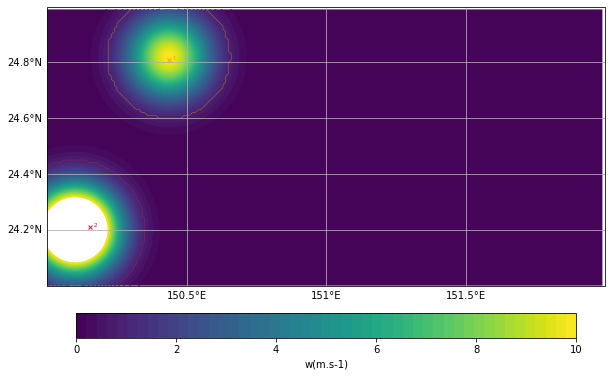

In [10]:
import warnings
warnings.filterwarnings('ignore')

import cartopy
import matplotlib.pyplot as plt
n = 40
%matplotlib inline
fig, geo_axes = plt.subplots(
            ncols=1,
            nrows=1,
            figsize=(10, 10),
            subplot_kw={"projection": cartopy.crs.PlateCarree()},
        )

tobac.plot_tracks_mask_field(track.where(track["frame"] == n), data[n], mask[n], features, axes=geo_axes,linewidth_contour = 0.3, axis_extent = [150, 152, 24, 25], vmin = 0, vmax = 10)

In [71]:
data[0].coord('latitude')

<AuxCoord: latitude / (degree)  [[24., 24., ..., 24., 24.], ...]  shape(100, 200)>

In [33]:
track["longitude"]

0      [150.14272026431718]
1      [150.14670731707318]
2       [150.1505560791706]
3      [150.15406167400883]
4      [150.15751239669422]
               ...         
105     [151.3042261427426]
106    [150.30149732620322]
107    [151.31549071618036]
108    [150.30864100549883]
109     [151.3279862475442]
Name: longitude, Length: 110, dtype: object

In [36]:
mask

Segmentation Mask (1),time,projection_x_coordinate,projection_y_coordinate
Shape,100,100,200
Dimension coordinates,,,
time,x,-,-
projection_x_coordinate,-,x,-
projection_y_coordinate,-,-,x
Auxiliary coordinates,,,
latitude,-,x,x
longitude,-,x,x


In [88]:
type(track)

pandas.core.frame.DataFrame

## animation_mask_field

In [181]:
kwargs = {
    'vmin' : 0.0,
    'vmax' : 15.0,
    'axis_extent' : [150, 152, 24, 25]}
anim = tobac.animation_mask_field(track, features, data, mask, **kwargs)

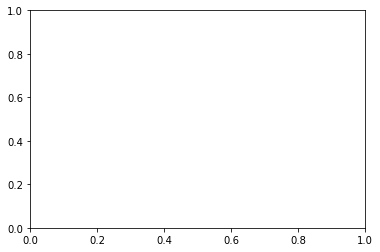

In [182]:
anim.save('vid.mp4')

In [183]:
tobac.animation_mask_field(track, features, data, mask, **kwargs)

## plot_mask_cell_track_follow
broken?
Entries of track['time_cell'] are already timedeltas.

/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/plotting.py:617: UserWarning: When using tobac plotting functions that render a figure, you may need to set the Matplotlib backend to 'agg' by `matplotlib.use('agg').
  warnings.warn(


AttributeError: 'Timedelta' object has no attribute 'dt'

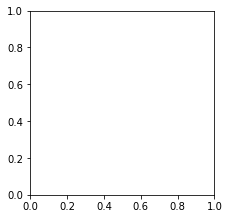

In [3]:
tobac.plot_mask_cell_track_follow(1, track, None, features, mask, None, None)

In [6]:
track['time_cell'][0]

Timedelta('0 days 00:00:00')

## plot_mask_cell_individual_follow
broken?
Applying .item() to an array with size > 1

TypeError: Cannot index by location index with a non-integer key

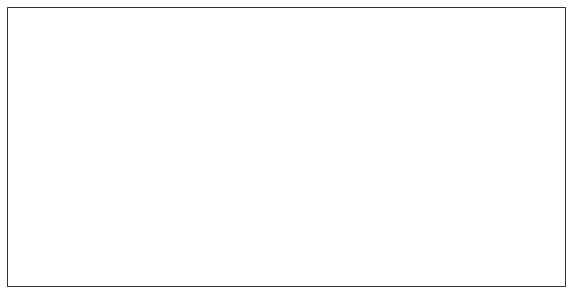

In [16]:
import cartopy
import matplotlib.pyplot as plt
import numpy as np
n = 40
%matplotlib inline
fig, geo_axes = plt.subplots(
            ncols=1,
            nrows=1,
            figsize=(10, 10),
            subplot_kw={"projection": cartopy.crs.PlateCarree()},
        )

tobac.plotting.plot_mask_cell_individual_follow(1, track.iloc(1), track, features, mask, None, None, axes=geo_axes)

In [23]:
track[track["cell"] == 1]["projection_x_coordinate"].item()

ValueError: can only convert an array of size 1 to a Python scalar

In [110]:
track[track["cell"] == 1]["projection_x_coordinate"].item()

0     13534.969325
1     15506.198347
2     17665.457842
3     20779.675491
4     24406.430338
5     28000.000000
6     31553.054662
7     35219.101124
8     38810.248199
9     42447.030498
10    46000.000000
11    49654.429370
12    53232.558140
13    56767.441860
14    60345.570630
15    64000.000000
16    67552.969502
17    71189.751801
18    74780.898876
19    78446.945338
21    81574.835526
23    83870.141343
25    85926.805143
27    87840.857788
29    89594.125501
Name: projection_x_coordinate, dtype: float64

## plot_mask_cell_track_static

broken?

2d: mask_features() has no z_coord keyword

In [64]:
%%capture

data = tobac.testing.make_sample_data_2D_3blobs_inv()
dxy, dt = tobac.utils.get_spacings(data)
features = tobac.feature_detection.feature_detection_multithreshold(data, dxy, threshold = 1)
mask, features = tobac.segmentation.segmentation(features, data, dxy, threshold = 1)
track = tobac.tracking.linking_trackpy(features, data, dt, dxy, v_max=100)

/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/plotting.py:942: UserWarning: When using tobac plotting functions that render a figure, you may need to set the Matplotlib backend to 'agg' by `matplotlib.use('agg').
  warnings.warn(


TypeError: mask_features() got an unexpected keyword argument 'z_coord'

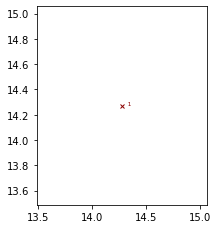

In [65]:
tobac.plotting.plot_mask_cell_track_static(1, track, track, features, mask, None, None)

## plot_mask_cell_individual_static

broken?

2d doesnt work since no z_coord

3d mask shape doenst match

In [120]:
features.iloc(0)

In [70]:
%%capture

data = tobac.testing.make_sample_data_3D_3blobs()
dxy, dt = tobac.utils.get_spacings(data)
features = tobac.feature_detection.feature_detection_multithreshold(data[:, 0], dxy, threshold = 1)
mask, features = tobac.segmentation.segmentation(features, data, dxy, threshold = 1)
track = tobac.tracking.linking_trackpy(features, data, dt, dxy, v_max=100)

UnboundLocalError: local variable 'mask_total_i_surface' referenced before assignment

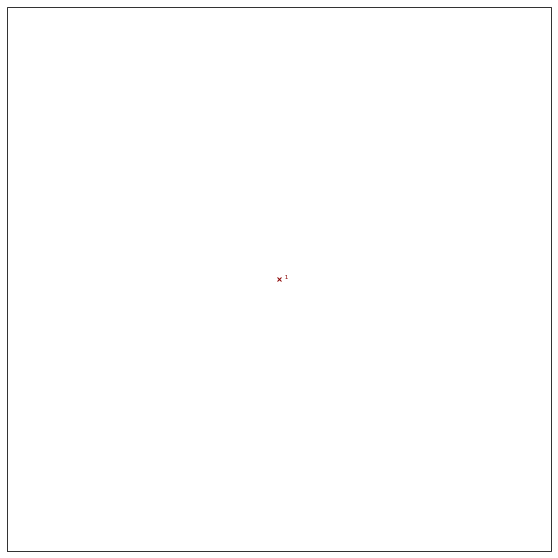

In [123]:
import cartopy
import matplotlib.pyplot as plt
n = 40
%matplotlib inline
fig, geo_axes = plt.subplots(
            ncols=1,
            nrows=1,
            figsize=(10, 10),
            subplot_kw={"projection": cartopy.crs.PlateCarree()},
        )

tobac.plotting.plot_mask_cell_individual_static(1, track, 1, features, mask, None, None, axes = geo_axes)

In [73]:
%%capture

data = tobac.testing.make_sample_data_2D_3blobs_inv()
dxy, dt = tobac.utils.get_spacings(data)
features = tobac.feature_detection.feature_detection_multithreshold(data, dxy, threshold = 1)
mask, features = tobac.segmentation.segmentation(features, data, dxy, threshold = 1)
track = tobac.tracking.linking_trackpy(features, data, dt, dxy, v_max=100)

CoordinateNotFoundError: "Expected to find exactly 1 'model_level_number' coordinate, but found none."

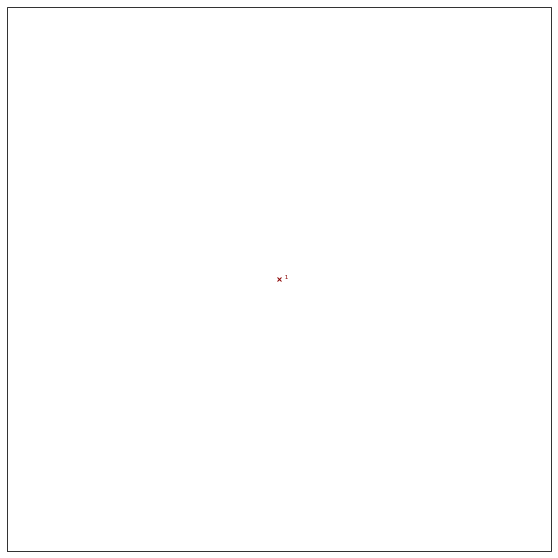

In [74]:
import cartopy
import matplotlib.pyplot as plt
n = 40
%matplotlib inline
fig, geo_axes = plt.subplots(
            ncols=1,
            nrows=1,
            figsize=(10, 10),
            subplot_kw={"projection": cartopy.crs.PlateCarree()},
        )


tobac.plotting.plot_mask_cell_individual_static(1, track, 1, features, mask, None, None, axes = geo_axes)

## plot_mask_cell_track_2D3Dstatic

In [78]:
%%capture

data = tobac.testing.make_sample_data_2D_3blobs_inv()
dxy, dt = tobac.utils.get_spacings(data)
features = tobac.feature_detection.feature_detection_multithreshold(data, dxy, threshold = 1)
mask, features = tobac.segmentation.segmentation(features, data, dxy, threshold = 1)
track = tobac.tracking.linking_trackpy(features, data, dt, dxy, v_max=100)

/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/plotting.py:1303: UserWarning: When using tobac plotting functions that render a figure, you may need to set the Matplotlib backend to 'agg' by `matplotlib.use('agg').
  warnings.warn(


TypeError: mask_features() got an unexpected keyword argument 'z_coord'

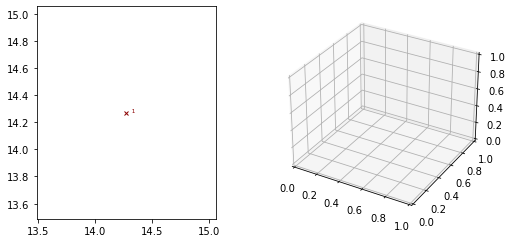

In [79]:
tobac.plotting.plot_mask_cell_track_2D3Dstatic(1, track, track, features, mask, None, None)

In [80]:
%%capture

data = tobac.testing.make_sample_data_3D_3blobs()
dxy, dt = tobac.utils.get_spacings(data)
features = tobac.feature_detection.feature_detection_multithreshold(data[:, 0], dxy, threshold = 1)
mask, features = tobac.segmentation.segmentation(features, data, dxy, threshold = 1)
track = tobac.tracking.linking_trackpy(features, data, dt, dxy, v_max=100)

/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/plotting.py:1303: UserWarning: When using tobac plotting functions that render a figure, you may need to set the Matplotlib backend to 'agg' by `matplotlib.use('agg').
  warnings.warn(
/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/utils.py:217: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mask_i_data[~isin(mask_i.core_data(), feature_ids)] = 0


IndexError: too many indices for array: array is 3-dimensional, but 40 were indexed

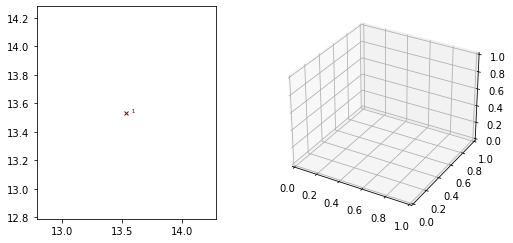

In [81]:
tobac.plotting.plot_mask_cell_track_2D3Dstatic(1, track, track, features, mask, None, None)

## plot_mask_cell_track_3Dstatic

In [85]:
%%capture

data = tobac.testing.make_sample_data_3D_3blobs()
dxy, dt = tobac.utils.get_spacings(data)
features = tobac.feature_detection.feature_detection_multithreshold(data[:, 0], dxy, threshold = 1)
mask, features = tobac.segmentation.segmentation(features, data, dxy, threshold = 1)
track = tobac.tracking.linking_trackpy(features, data, dt, dxy, v_max=100)

/home/nils/anaconda3/envs/tobac/lib/python3.10/site-packages/tobac/plotting.py:1477: UserWarning: When using tobac plotting functions that render a figure, you may need to set the Matplotlib backend to 'agg' by `matplotlib.use('agg').
  warnings.warn(


CoordinateNotFoundError: "Expected to find exactly 1 'model_level_number' coordinate, but found none."

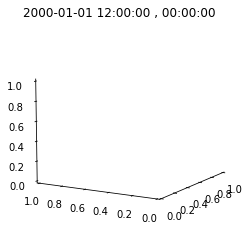

In [86]:
tobac.plotting.plot_mask_cell_track_3Dstatic(1, track, None, features, mask, None, None)

In [87]:
mask

Segmentation Mask (1),time,geopotential_height,projection_y_coordinate,projection_x_coordinate
Shape,25,20,200,100
Dimension coordinates,,,,
time,x,-,-,-
geopotential_height,-,x,-,-
projection_y_coordinate,-,-,x,-
projection_x_coordinate,-,-,-,x
Auxiliary coordinates,,,,
latitude,-,-,x,x
longitude,-,-,x,x


## plot_mask_cell_individual_track_3Dstatic

broken?



In [104]:
%%capture

data = tobac.testing.make_sample_data_3D_3blobs()
dxy, dt = tobac.utils.get_spacings(data)
features = tobac.feature_detection.feature_detection_multithreshold(data[:, 0], dxy, threshold = 1)
mask, features = tobac.segmentation.segmentation(features, data, dxy, threshold = 1)
track = tobac.tracking.linking_trackpy(features, data, dt, dxy, v_max=100)

CoordinateNotFoundError: "Expected to find exactly 1 'model_level_number' coordinate, but found none."

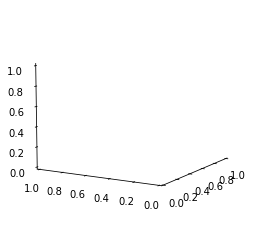

In [105]:
import cartopy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

n = 40
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111,
                     projection='3d')

tobac.plotting.plot_mask_cell_individual_3Dstatic(1, track, None, features, mask, None, None, axes = ax)

In [107]:
mask['geopotential_height']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [93]:
tobac.plotting.plot_mask_cell_individual_3Dstatic(1, track, None, features, mask, None, None, axes = ax)

CoordinateNotFoundError: "Expected to find exactly 1 'model_level_number' coordinate, but found none."

In [11]:
track

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_x_coordinate,projection_y_coordinate,latitude,longitude,ncells,cell,time_cell
0,0,1,14.272026,14.272026,908,1,1,2000-01-01 12:00:00,2000-01-01 12:00:00,14272.026432,14272.026432,[24.14272026431718],[150.14272026431718],904.0,1,0 days 00:00:00
1,1,1,15.228659,14.670732,984,1,2,2000-01-01 12:01:00,2000-01-01 12:01:00,15228.658537,14670.731707,[24.15228658536585],[150.14670731707318],983.0,1,0 days 00:01:00
2,2,1,16.162111,15.055608,1061,1,3,2000-01-01 12:02:00,2000-01-01 12:02:00,16162.111216,15055.607917,[24.16162111215834],[150.1505560791706],1059.0,1,0 days 00:02:00
3,3,1,17.130396,15.406167,1135,1,4,2000-01-01 12:03:00,2000-01-01 12:03:00,17130.396476,15406.167401,[24.171303964757712],[150.15406167400883],1135.0,1,0 days 00:03:00
4,4,1,18.143802,15.751240,1210,1,5,2000-01-01 12:04:00,2000-01-01 12:04:00,18143.801653,15751.239669,[24.181438016528926],[150.15751239669422],1208.0,1,0 days 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,67,2,85.393745,130.422614,1247,1,106,2000-01-01 13:07:00,2000-01-01 13:07:00,85393.744988,130422.614274,[24.853937449879712],[151.3042261427426],1247.0,3,0 days 00:17:00
106,68,1,83.326203,30.149733,1496,1,107,2000-01-01 13:08:00,2000-01-01 13:08:00,83326.203209,30149.732620,[24.83326203208556],[150.30149732620322],1127.0,2,0 days 00:28:00
107,68,2,86.731211,131.549072,1131,1,108,2000-01-01 13:08:00,2000-01-01 13:08:00,86731.211317,131549.071618,[24.867312113174183],[151.31549071618036],1127.0,3,0 days 00:18:00
108,69,1,85.863315,30.864101,1273,1,109,2000-01-01 13:09:00,2000-01-01 13:09:00,85863.315004,30864.100550,[24.858633150039275],[150.30864100549883],1015.0,2,0 days 00:29:00
